<a href="https://colab.research.google.com/github/MayongSu/GANs/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = (x_train.astype('float32') - 127.5) / 127.5  # Normalisasi data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, LeakyReLU

def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))  # Menambah jumlah neuron di layer pertama
    model.add(LeakyReLU(alpha=0.2))  # Menggunakan LeakyReLU sebagai aktivasi
    model.add(Dense(512))  # Menambah layer Dense baru
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(784, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model
generator = build_generator()

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, LeakyReLU, Dropout
from tensorflow.keras.models import Sequential

def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(28, 28, 1)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))  # Menambahkan Dropout
    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

discriminator.trainable = False
gan_input = Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)

gan = Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
import numpy as np

def train_gan(gan, generator, discriminator, data, epochs=10, batch_size=128):
    for epoch in range(epochs):
        noise = np.random.normal(0, 1, (batch_size, 100))
        generated_images = generator.predict(noise)

        idx = np.random.randint(0, data.shape[0], batch_size)
        real_images = data[idx]

        # Label
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        # Train discriminator
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, real_labels)

        if epoch % 1000 == 0:
            print(f"Epoch: {epoch}, D Loss: {d_loss_real[0] + d_loss_fake[0]}, G Loss: {g_loss}")

train_gan(gan, generator, discriminator, x_train)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch: 0, D Loss: 2.466142416000366, G Loss: [array(1.2349265, dtype=float32), array(1.2349265, dtype=float32), array(0.24881904, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


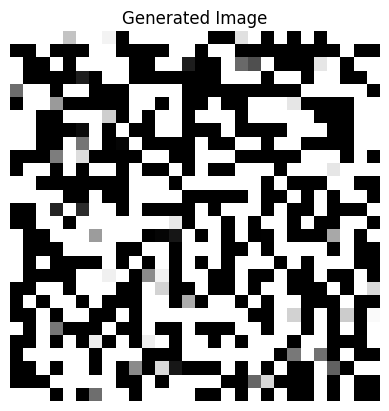

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Misalnya, ukuran input noise yang digunakan oleh Generator adalah 100
noise = np.random.normal(0, 1, (1, 100))  # Membuat noise acak untuk satu gambar
generated_image = generator.predict(noise)  # Menghasilkan gambar dengan Generator

# Jika gambar berbentuk (28, 28, 1) seperti pada kasus MNIST, kita bisa reshape
generated_image = generated_image.reshape(28, 28)  # Sesuaikan dimensi jika perlu

# Menampilkan gambar dengan matplotlib
plt.imshow(generated_image, cmap='gray')
plt.title("Generated Image")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


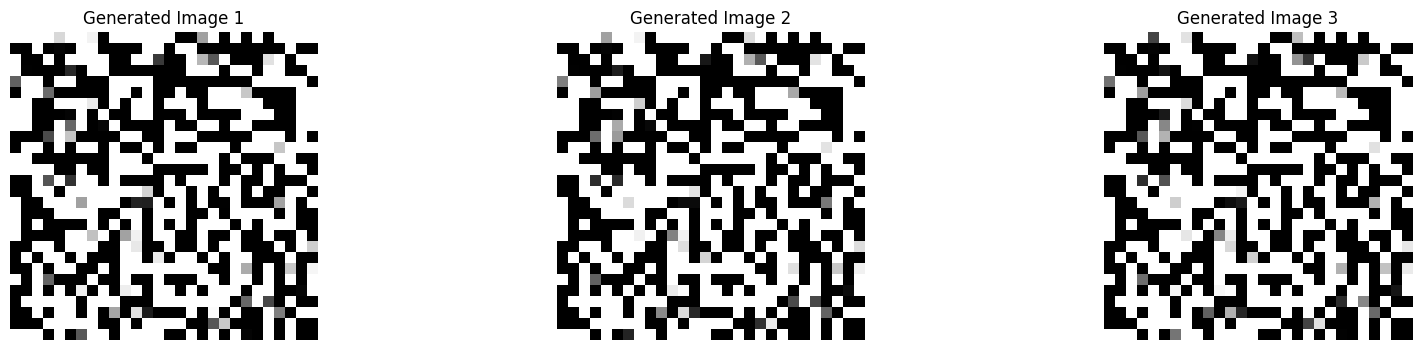

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Jumlah gambar yang ingin ditampilkan
num_images = 3  # Ubah jumlah gambar yang ingin ditampilkan

# Membuat noise acak untuk beberapa gambar
noise = np.random.normal(0, 1, (num_images, 100))

# Menghasilkan gambar dengan Generator
generated_images = generator.predict(noise)

# Menampilkan gambar-gambar dengan matplotlib
fig, axes = plt.subplots(1, num_images, figsize=(20, 4))  # Adjust figure size

for i in range(num_images):
    axes[i].imshow(generated_images[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Generated Image {i+1}")  # Add title to each image

plt.show()